## For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

> Has the network latency gone up since we switched internet service providers? 

>Is the website redesign any good?

>Is our television ad driving more sales?

$H_0$: the network latency is the same since the ISP switch.

$H_a$: the new ISP has higher latency
    
- True Positive: rejected $H_0$, our latency is ~ 300ms on average with the new ISP, it was ~50ms previously
    
- False Positive: rejected $H_0$, our data says the latency is higher; maybe data is biased, took recordings between 6pm and 8pm when everyone is streaming media
    
- False Negative: failed to reject $H_0$: maybe recordings are between 6am and 7am when no one is on the network
    
- True Negative: data shows there isn't much difference in latency and fail to reject $H_0$

Is the website redesign any good?


Is our TV ad driving more sales?

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
Use a .05 level of significance.

- Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

- Are compact cars more fuel-efficient than the average car?

- Do manual cars get better gas mileage than automatic cars?

In [18]:
from math import sqrt
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
import statistics

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

What are we comparing?

- average time (numeric continous values) for two different groups (categories)

- One sample or two sample?

- One tailed or two tailed?

Form a hypothesis

In [24]:
# H_0: Average time to sell at office 1 == average time to sell at office 2

# H_a: Average time to sell at office 1 != average time to sell at office 2

In [25]:
alpha = 0.5

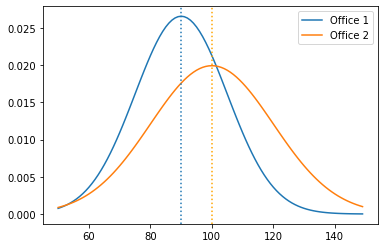

In [26]:
#visualize distributions

x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.plot(x, y1, label = 'Office 1')
plt.plot(x, y2, label = 'Office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')


plt.legend()

In [27]:
#using scipy to calculate t & p

t, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var=False)
t,p

(-2.7091418459143854, 0.00811206270346016)

In [ ]:
if p < alpha:
    print('we reject')

In [20]:
mpg = data('mpg')
mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Comparing fuel economy two different sub-groups (2-sample, 2-tailed t-test)

: there is no difference in fuel-efficiency in cars from 2008 vs 1999
: there is a difference in fuel-efficiency in cars from 2008 vs 1999

Calculate average fuel economy assuming 50% highway and 50% city driving

Should I use arithmetic mean or harmonic mean for average mpg?

Arithmetic Mean: fe_am = (cty + hwy)/2

Harmonic Mean: fe_hm = 2/(1/cty + 1/hwy)

In [21]:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [22]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

<AxesSubplot:>

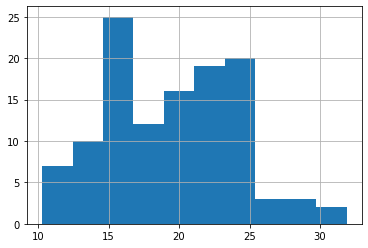

In [28]:
fe_2008.hist()

<AxesSubplot:>

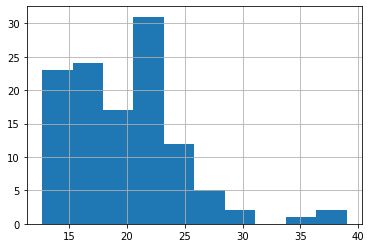

In [29]:
fe_1999.hist()

In [23]:
t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [30]:
fe_2008.var(), fe_1999.var()

(22.550836772260343, 25.850396545865912)

In [32]:
stats.levene(fe_2008, fe_1999)

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [33]:
t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [35]:
if p < alpha:
    print('reject null')
else:
    print('fail to reject null')

fail to reject null


In [36]:
fe_2008.mean(), fe_1999.mean()

(19.488662986569054, 19.68238764869729)

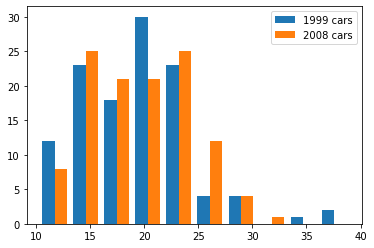

In [37]:
plt.hist([fe_1999, fe_2008], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

2. Are compact cars more fuel-efficient than the average car?
Comparing fuel economy two different sub-groups (1-sample, 1-tailed t-test)

𝐻0 There is no difference in fuel-efficiency between compact cars and the population average fuel-efficiency

𝐻𝑎 Compact cars are more fuel efficient than the average car

for 𝐻𝑎 to be true, t > 0 and p/2 < 0.05

In [41]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
μ = mpg.avg_fe.mean()

t, p = stats.ttest_1samp(fe_compact, μ)
t, p

(7.512360093161354, 1.5617666348807727e-09)

In [42]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

In [43]:
fe_auto.var(), fe_manual.var()

(20.428279095002054, 25.665633639828275)

In [44]:
stats.levene(fe_auto, fe_manual)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [45]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

Text(0.5, 1.0, 'Is mileage different by transmission type?')

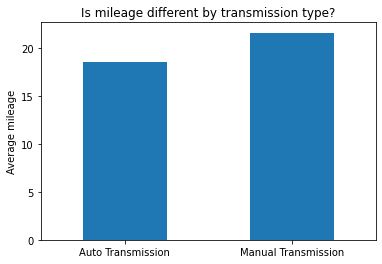

In [46]:
mpg.groupby('transmission_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Is mileage different by transmission type?')

In [47]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var=True)
t, p/2

(4.652577547151351, 2.7552323050220026e-06)

In [48]:
fe_manual.mean(), fe_auto.mean()

(21.629228592155194, 18.583199507835747)

In [56]:
telco = pd.read_csv(r"/Users/Ray/downloads/jemison_spreadsheet_exercises - RDS - Table1_CustDetails.csv")

telco.head(4).T

,0,1,2,3
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF
gender,Female,Male,Male,Male
is_senior_citizen,0,0,0,1
partner,Yes,No,No,Yes
dependents,Yes,No,No,No
phone_service,1,2,1,1
internet_service,1,1,2,2
contract_type,1,0,0,0
payment_type,Mailed check,Mailed check,Electronic check,Electronic check
monthly_charges,65.6,59.9,73.9,98.0


#1 Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [57]:
telco.head(5)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data

In [61]:
n = telco.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval

In [62]:
x = telco.monthly_charges
y = telco.total_charges

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy

0.650632836884393

What happens if you control for phone and internet service?

$H_o$: tenure and monthly charges are not linearly correlated

$H_a$: tenure and monthly charges are linearly correlated

then

$H_o$: tenure and total charges are not linearly correlated

$H_a$: tenure and total charges are linearly correlated

then

Control for Phone and Internet Service

In [64]:
t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t


71.92366868054806

In [65]:
p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p


0.0

In [66]:
p < α


True

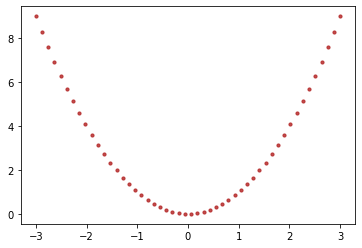

In [70]:
x = np.linspace(-3, 3)
y = x ** 2
plt.scatter(x, y, s=10, c='firebrick', alpha=.8)

In [71]:
r, p = stats.pearsonr(x, y)
print(f'r = {r:.5f}')
print(f'p = {p:.1f}')


r = -0.00000
p = 1.0


r, p = stats.pearsonr(telco.monthly_charges, telco.total_charges)

df.plot.scatter('monthly_charges', 'total_charges')
plt.title('charges')
plt.text(8, 80, f'r = {r:.3f}')

In [73]:
confidence_level = 0.95
alpha = 1 - confidence_level
alpha

0.050000000000000044

In [77]:
# 𝐻𝑜 : tenure and monthly charges are not linearly correlated
# 𝐻𝑎 : tenure and monthly charges are linearly correlated

corr, p = stats.pearsonr(telco.tenure, telco.monthly_charges)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    
corr, p

We reject the null hypothesis


(0.2471848922499011, 1.2811368994929208e-98)

In [78]:
# 𝐻𝑜 : tenure and total charges are not linearly correlated
# 𝐻𝑎 : tenure and total charges are linearly correlated

corr, p = stats.pearsonr(telco.tenure, telco.total_charges)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    
corr, p

ValueError: array must not contain infs or NaNs